In [2]:
from joblib import dump
from pandas import read_csv, get_dummies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

In [3]:
# Load data
df = read_csv("../data/processed/cleaned_churn.csv")

In [4]:
# Preprocess
df = df.dropna(subset=["churn"])
df.drop(columns=["customerid"], inplace=True, errors="ignore")
df["churn"] = df["churn"].str.strip().str.lower().map({"no": 0, "yes": 1})
df_encoded = get_dummies(df, drop_first=True)

X = df_encoded.drop("churn", axis=1)
y = df_encoded["churn"]

In [5]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [6]:
# Evaluate models
def train_and_evaluate(model, name):
    print(f"\n🔹 Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    filename = f"../models/{name.lower().replace(' ', '_')}_model.joblib"
    dump(model, filename=filename)
    print(f"Save {name} model to {filename}")


🔹 Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.65      0.55      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.80      1407

ROC AUC: 0.8362733018931412


/Users/solvo/Library/Caches/pypoetry/virtualenvs/02-customer-churn-prediction-ADMgsp-s-py3.13/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Save Logistic Regression model to ../models/logistic_regression_model.joblib

🔹 Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

ROC AUC: 0.8197672010809075
Save Random Forest model to ../models/random_forest_model.joblib

🔹 Model: Gradient Boosting
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1033
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407

ROC AUC: 0.8404522417961289
Save Gradient Boosting model to ../models/gradie

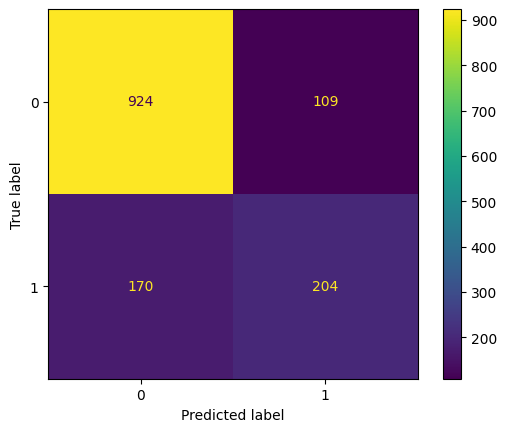

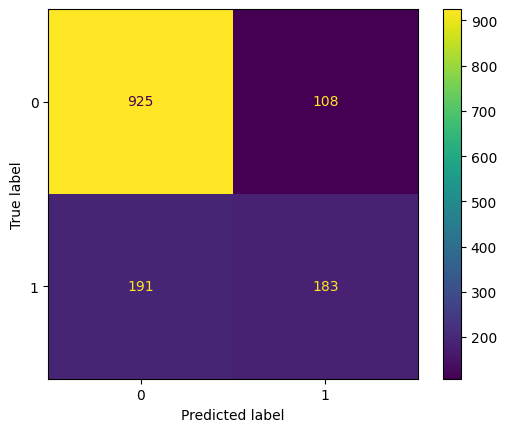

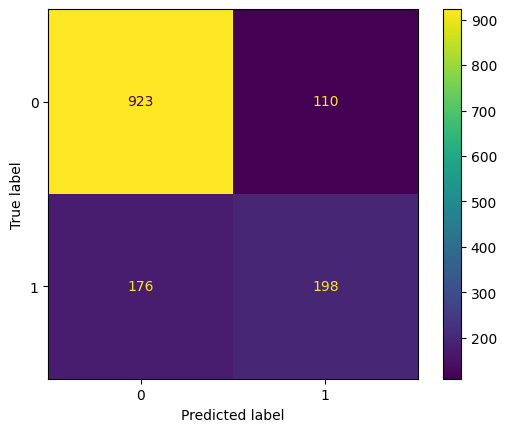

In [7]:
# Run models
train_and_evaluate(LogisticRegression(max_iter=1000, solver="lbfgs"), "Logistic Regression")
train_and_evaluate(RandomForestClassifier(random_state=42), "Random Forest")
train_and_evaluate(GradientBoostingClassifier(random_state=42), "Gradient Boosting")